In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cosine_sim_bert = pd.read_csv('/content/drive/MyDrive/w210_Capstone_Project_Fall2021/Repo/memorai/alice/raw_data/cosine_sim_bert.csv')

In [ ]:
cosine_sim_bert["Label"] = np.where(cosine_sim_bert['Context'] == 'Related', 1, 0)

In [ ]:
scores = pd.DataFrame(columns = ['Threshold', 'Precision', 'Recall', 'F1_Score', 'Specificity'])

In [ ]:
for n in np.arange(0, 1, 0.01):
  threshold = n
  cosine_sim_bert["Preds"] = np.where(cosine_sim_bert['Similarity'] >= threshold, 1, 0)
  precision = precision_score(cosine_sim_bert.Label, cosine_sim_bert.Preds, average='binary', zero_division=True)
  recall = recall_score(cosine_sim_bert.Label, cosine_sim_bert.Preds, average='binary')
  f1 = f1_score(cosine_sim_bert.Label, cosine_sim_bert.Preds, average='binary')
  tn, fp, fn, tp = confusion_matrix(cosine_sim_bert.Label, cosine_sim_bert.Preds).ravel()
  specificity = tn / (tn+fp)
  scores.loc[len(scores.index)] = [threshold, precision, recall, f1, specificity]

  

In [ ]:
os.chdir("/content/drive/MyDrive/w210_Capstone_Project_Fall2021/Repo/memorai/alice/raw_data")

In [ ]:
scores.to_csv("bertopic_experiment_alex.csv")

In [ ]:
scores

,Threshold,Precision,Recall,F1_Score,Specificity
0,0.00,0.503546,1.0,0.669811,0.014085
1,0.01,0.510791,1.0,0.676190,0.042254
2,0.02,0.518248,1.0,0.682692,0.070423
3,0.03,0.522059,1.0,0.685990,0.084507
4,0.04,0.525926,1.0,0.689320,0.098592
...,...,...,...,...,...
195,0.95,1.000000,0.0,0.000000,1.000000
196,0.96,1.000000,0.0,0.000000,1.000000
197,0.97,1.000000,0.0,0.000000,1.000000
198,0.98,1.000000,0.0,0.000000,1.000000


Text(0, 0.5, 'Metric Value')

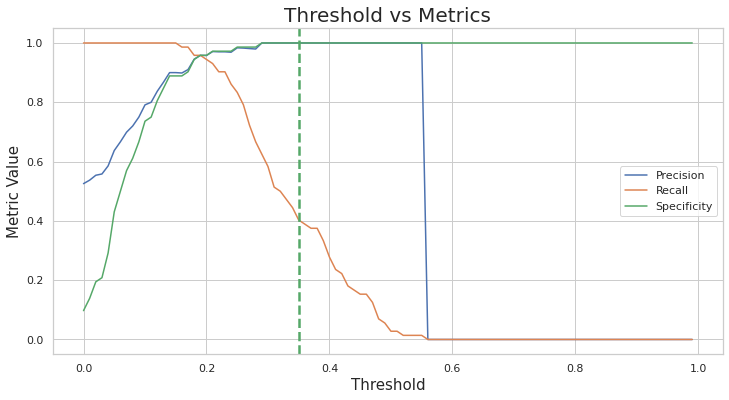

In [ ]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.set_style("whitegrid")
sns.lineplot(data=scores, x="Threshold", y="Precision")
sns.lineplot(data=scores, x="Threshold", y="Recall")
#sns.lineplot(data=scores, x="Threshold", y="F1_Score")
sns.lineplot(data=scores, x="Threshold", y="Specificity")
plt.legend(labels=['Precision', 'Recall', 'Specificity'])
plt.axvline(0.35, linewidth=2.5, color= 'g', linestyle='--')
plt.title("Threshold vs Metrics", fontsize = 20)
plt.xlabel("Threshold", fontsize = 15)
plt.ylabel("Metric Value", fontsize = 15)